**Importing required libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math

**Preprocessing of given data file**

In [51]:
col = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']
df = pd.read_csv("Diabetes.csv",names=col, header=None)
df1 = df.drop([0],axis=0)
df = df1.drop('x9',axis=1)
df = df.astype(float)

In [52]:
datas = df.to_numpy()

**Function to plot graph**

In [53]:
def plot(new_df):
  n=len(new_df) 
  y=np.zeros(n)
  for i in range(1,n):
    cluster = 0
    val = new_df.at[i,'x9']
    if(val==1):
      cluster = 1
    y[i]=cluster
    
  plt.scatter(new_df['PC1'] , new_df['PC2'] , c=y , s=20)
  plt.show()

**Main function to implement PCA**

In [54]:
def PCA(datas):

  #subtracting mean
  new_data = datas - np.mean(datas , axis=0)
  #print(new_data)

  #covariance matrix
  cov_mat = np.cov(new_data , rowvar=False)
  #print(cov_mat)

  #eigen values, eigen vectors of covariance matrix & sort theem to find principle component
  e_val , e_vec = LA.eig(cov_mat)
  #sorted_order = e_val.argsort()[::-1]
  #sorted_eval = e_val[sorted_order]
  #sorted_evec = e_vec[: , sorted_order]

  

  indices = np.arange(0,len(e_val), 1)
  indices = e_val.argsort()[::-1]
  sorted_eval = e_val[indices]
  sorted_evec = e_vec[:,indices]

  print(sorted_evec)

  #vector of two principle component
  prncpl_comp = sorted_evec[: , 0:2] 
  #print(prncpl_comp)

  #transformation of given data according to these components
  #reduced_data = np.dot(np.dot(prncpl_comp , prncpl_comp.transpose()) , new_data.transpose()).transpose()
  reduced_data = np.dot(prncpl_comp.transpose() , new_data.transpose()).transpose()
  print(reduced_data)

  #creating new dataframe 
  old_df = pd.DataFrame(reduced_data , index= range(1,769) , columns=['PC1' , 'PC2'])
  outcome = pd.DataFrame(df1['x9'])
  outcome = outcome.astype(float)
  new_df = pd.concat([old_df , outcome] , axis=1)

  plot(new_df)
  return old_df , outcome

[[-2.02176587e-03  2.26488861e-02 -2.24649003e-02 -4.90459604e-02
   1.51612874e-01  5.04730888e-03 -9.86672995e-01 -6.10123250e-03]
 [ 9.78115765e-02  9.72210040e-01  1.43428710e-01  1.19830016e-01
  -8.79407680e-02 -5.07391813e-02 -8.83426114e-04  8.25459539e-04]
 [ 1.60930503e-02  1.41909330e-01 -9.22467192e-01 -2.62742788e-01
  -2.32165009e-01 -7.56365525e-02  1.22975947e-03 -5.20865450e-04]
 [ 6.07566861e-02 -5.78614699e-02 -3.07013055e-01  8.84369380e-01
   2.59973487e-01 -2.21363068e-01  3.76444746e-04  2.54871909e-03]
 [ 9.93110844e-01 -9.46266913e-02  2.09773019e-02 -6.55503615e-02
  -1.72312241e-04  6.13326472e-03 -1.42307394e-03  2.68965921e-04]
 [ 1.40108085e-02  4.69729766e-02 -1.32444542e-01  1.92801728e-01
   2.14744823e-02  9.70776708e-01  2.73046214e-03  2.67341863e-03]
 [ 5.37167919e-04  8.16804621e-04 -6.39983017e-04  2.69908637e-03
   1.64080684e-03  2.02903702e-03  6.34402965e-03 -9.99972146e-01]
 [-3.56474430e-03  1.40168181e-01 -1.25454310e-01 -3.01024330e-01
   

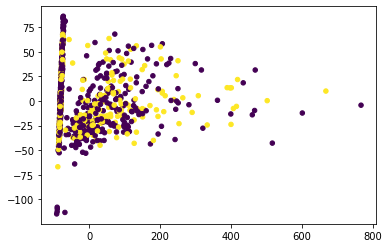

In [55]:
old_df , outcome = PCA(datas)

In [56]:
print(old_df)
n=len(old_df)
n_train=math.ceil(n*0.8)
n_test=n-n_train
x_train=old_df.iloc[0:n_train,:]
x_test=old_df.iloc[n_train:n,:]
y_train=outcome.iloc[0:n_train]
y_test=outcome.iloc[n_train:n]
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")

           PC1        PC2
1   -75.714655  35.950783
2   -82.358268 -28.908213
3   -74.630643  67.906496
4    11.077423 -34.898486
5    89.743788   2.746937
..         ...        ...
764  99.237881 -25.080927
765 -78.641239   7.688010
766  32.113198  -3.376665
767 -80.214494  14.186020
768 -81.308150 -21.621496

[768 rows x 2 columns]
X_train: (615, 2), y_train: (615, 1)
X_test: (153, 2), y_test: (153, 1)


In [57]:
n_col=len(x_train.columns)
print(n_col)

2


In [58]:
n_col=len(x_train.columns)
w=np.random.randn(n_col,1)

y_pred=np.dot(x_train,w)
print(x_train.shape,w.shape,y_train.shape)
m=len(y_train)
lembda=13
loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2

print(loss)

(615, 2) (2, 1) (615, 1)
[[434.18592972]]


In [59]:
gw=(-1/m)*np.dot(x_train.transpose(),(y_train-y_pred))+lembda*w
print(gw)
alpha=1e-1
w=w-alpha*gw

[[-3087.15049438]
 [  395.13504891]]


In [60]:
itr=0
m=len(x_train)
alpha=0.0001
lembda=10
w=np.random.randn(n_col,1)
wlist=[]
losslist=[]
itrlist=[]
while(itr!=100):
  y_pred=np.dot(x_train,w)
  loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+(lembda*(np.dot(w.transpose(),w))/2)
  if itr==99:
    print(f"itr:{itr}, loss{loss}")
  
  
  
  gw=(-1/m)*np.dot(x_train.transpose(),(y_train-y_pred))+lembda*w
  w=w-alpha*gw
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss[0][0])
  itr=itr+1
  

print(w)

itr:99, loss[[0.15107951]]
[[0.00064668]
 [0.00637045]]


In [61]:
pred_train=np.dot(x_train,w)
pred_test =np.dot(x_test,w) 
print(pred_train.shape,pred_test.shape)

(615, 1) (153, 1)


In [62]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse} test_MSE: {test_mse}")

train_MSE: x9    0.301749
dtype: float64 test_MSE: x9    0.288048
dtype: float64


In [63]:
pred = np.dot(x_test, w)
sum=0
for i in range(len(pred)):
  if y_test.iloc[i][0]==0:
    if ((pred[i][0]*(-1)) >= 0):
      sum+=1
  else:
    if (pred[i][0]*y_test.iloc[i][0]) >= 0:
      sum+=1
  

accuracy = sum/len(pred)
print("Accuracy on test data =",accuracy*100)

Accuracy on test data = 71.89542483660131


In [64]:
pred = np.dot(x_train, w)
sum=0
for i in range(len(pred)):
  if y_train.iloc[i][0]==0:
    if ((pred[i][0]*(-1)) >= 0):
      sum+=1
  else:
    if (pred[i][0]*y_train.iloc[i][0]) >= 0:
      sum+=1
  

accuracy = sum/len(pred)
print("Accuracy on training data =",accuracy*100)

Accuracy on training data = 70.5691056910569
